In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/content/BH.csv")
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
df.isna().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [ ]:
for col in df.select_dtypes(include=['number']):
  df[col] = df[col].fillna(df[col].mean())

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = df.select_dtypes(include=['number']).columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [5]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['MEDV'])
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X,y ,
                                   random_state=104,
                                   test_size=0.40,
                                   shuffle=True)

In [6]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [ ]:
# WITHOUT ACTIVATION
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dense(1)
])

X_train.shape[1]
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

model.summary()
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)
y_pred = model.predict(X_test)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,accuracy_score
import math

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

rmse = math.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

r2 = r2_score(y_test, y_pred)
print(f'R-squared (R²): {r2}')



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 128)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,921 (7.50 KB)

 Trainable params: 1,921 (7.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 1.1907 - mae: 0.8221 - val_loss: 0.9348 - val_mae: 0.7152
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.8164 - mae: 0.6745 - val_loss: 0.5482 - val_mae: 0.5197
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3825 - mae: 0.4514 - val_loss: 0.3647 - val_mae: 0.4195
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2829 - mae: 0.3662 - val_loss: 0.3259 - val_mae: 0.3900
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.3260 - mae: 0.3835 - val_loss: 0.3117 - val_mae: 0.3816
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2596 - mae: 0.3415 - val_loss: 0.2968 - val_mae: 0.3698
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2610 - mae: 0.3367 - val_loss: 0.2918 - val_mae: 0.3642
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2413 - mae: 0.3433 - val_loss: 0.2910 - val_mae: 0.3631
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - lo

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Mean Absolute Error (MAE): 0.36135897010435014
Mean Squared Error (MSE): 0.2812550468514112
Root Mean Squared Error (RMSE): 0.530334844085707
R-squared (R²): 0.7108186387734267


In [7]:
import tensorflow as tf
from keras.layers import Dense, Activation,Dropout
from keras.models import Sequential

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

X_train.shape[1]
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

model.summary()
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)
y_pred = model.predict(X_test)
y_pred
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,accuracy_score
import math

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

rmse = math.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

r2 = r2_score(y_test, y_pred)
print(f'R-squared (R²): {r2}')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.6927 - mae: 0.6061 - val_loss: 0.4827 - val_mae: 0.4809
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3907 - mae: 0.4298 - val_loss: 0.3903 - val_mae: 0.4103
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2822 - mae: 0.3458 - val_loss: 0.2975 - val_mae: 0.3482
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1639 - mae: 0.2828 - val_loss: 0.2471 - val_mae: 0.3276
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2005 - mae: 0.2809 - val_loss: 0.2314 - val_mae: 0.3170
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1536 - mae: 0.2468 - val_loss: 0.2275 - val_mae: 0.3139
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1276 - mae: 0.2390 - val_loss: 0.2128 - val_mae: 0.3056
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1850 - mae: 0.2589 - val_loss: 0.2163 - val_mae: 0.3028
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss

LA2:

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,Dropout,GlobalAveragePooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv("IMDB.csv", on_bad_lines='skip')


In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [ ]:
texts = df["review"].values
labels = LabelEncoder().fit_transform(df["sentiment"].values)

In [ ]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded = pad_sequences(sequences,maxlen=200)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(padded,labels,test_size=0.2,random_state=42)

In [ ]:
model = Sequential([
    Embedding(input_dim=10000,output_dim=32,input_shape=(2000,)),
    GlobalAveragePooling1D(),
    Dense(32,activation='relu'),
    Dropout(0.5),
    Dense(1,activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',
              metrics=['Accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 2000, 32)       │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_2      │ (None, 32)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321,089 (1.22 MB)

 Trainable params: 321,089 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience = 3,restore_best_weights= True)
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[early_stop],epochs=10,batch_size=32)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - Accuracy: 0.6857 - loss: 0.5714 - val_Accuracy: 0.8804 - val_loss: 0.2922
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - Accuracy: 0.8861 - loss: 0.2895 - val_Accuracy: 0.8887 - val_loss: 0.2688
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - Accuracy: 0.9104 - loss: 0.2422 - val_Accuracy: 0.8613 - val_loss: 0.3097
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - Accuracy: 0.9240 - loss: 0.2142 - val_Accuracy: 0.8588 - val_loss: 0.3152
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - Accuracy: 0.9289 - loss: 0.2006 - val_Accuracy: 0.8875 - val_loss: 0.2768


In [ ]:
loss,accuracy = model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Accuracy: 0.8888 - loss: 0.2721


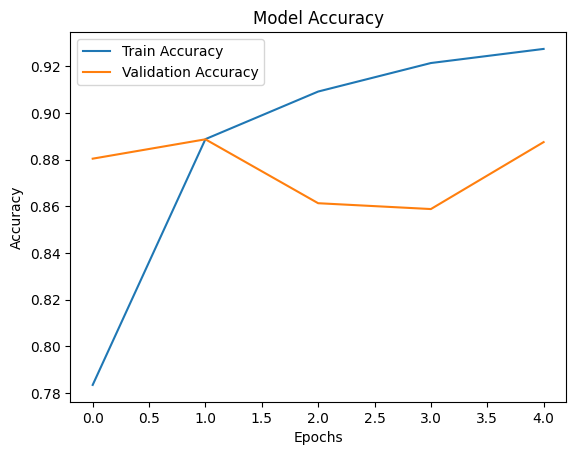

In [ ]:
plt.plot(history.history['Accuracy'],label = 'Train Accuracy')
plt.plot(history.history['val_Accuracy'],label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Model Accuracy")
plt.show()

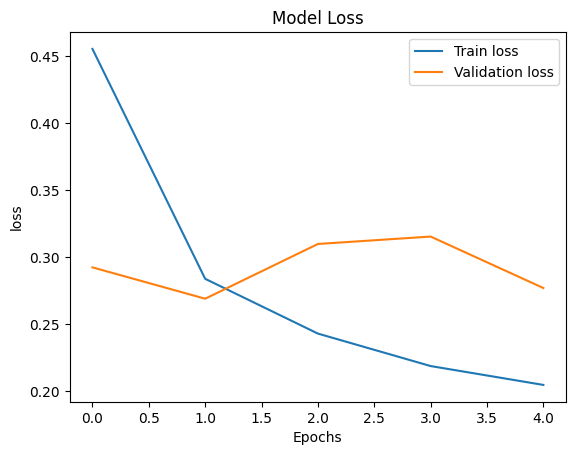

In [ ]:
plt.plot(history.history['loss'],label = 'Train loss')
plt.plot(history.history['val_loss'],label = 'Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.title("Model Loss")
plt.show()

LA-3

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator    # for data agmuntation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import load_img, img_to_array
import glob
import matplotlib.pyplot as plt

In [ ]:
!unzip /content/Plant_Disease_Dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: New Plant Diseases Dataset(Augmented)/train/Corn_(maize)___healthy/9cd620cd-c044-4da1-aa74-7656bd38b68b___R.S_HL 8335 copy 3_flipLR.jpg  
  inflating: New Plant Diseases Dataset(Augmented)/train/Corn_(maize)___healthy/9d205e36-c1d6-40d6-93b8-ebd1c732ff00___R.S_HL 8085 copy 2.jpg  
  inflating: New Plant Diseases Dataset(Augmented)/train/Corn_(maize)___healthy/9d205e36-c1d6-40d6-93b8-ebd1c732ff00___R.S_HL 8085 copy 2_flipLR.jpg  
  inflating: New Plant Diseases Dataset(Augmented)/train/Corn_(maize)___healthy/9d47547e-512f-49d0-9589-081a50333382___R.S_HL 7985 copy_flipLR.jpg  
  inflating: New Plant Diseases Dataset(Augmented)/train/Corn_(maize)___healthy/9d7fe0ec-48b6-4b1e-83ea-391d53de37af___R.S_HL 8210 copy 3.jpg  
  inflating: New Plant Diseases Dataset(Augmented)/train/Corn_(maize)___healthy/9d7fe0ec-48b6-4b1e-83ea-391d53de37af___R.S_HL 8210 copy 3_flipLR.jpg  
  inflating: New Plant Diseases Dataset(Augmented)/train/Co

In [ ]:
# Define paths for training and validation
train_dir = "/content/New Plant Diseases Dataset(Augmented)/train"
valid_dir = "/content/New Plant Diseases Dataset(Augmented)/valid"

# Image size and batch size
image_size = (128, 128)
batch_size = 32

# Data generators
train_datagen = ImageDataGenerator(rescale=1.0/255)
valid_datagen = ImageDataGenerator(rescale=1.0/255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

valid_data = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 18504 images belonging to 10 classes.
Found 4626 images belonging to 10 classes.


In [ ]:
# Define test directory
test_dir = "/content/New Plant Diseases Dataset(Augmented)/test"

# Get all test image paths
test_image_paths = glob.glob(test_dir + "/*.JPG")

# Preprocess test images
test_images = []
for img_path in test_image_paths:
    img = load_img(img_path, target_size=(128, 128))  # Resize images to (128, 128)
    img_array = img_to_array(img) / 255.0  # Normalize pixel values
    test_images.append(img_array)

test_images = np.array(test_images)  # Convert to NumPy array
print(f"Loaded {len(test_images)} test images.")


Loaded 33 test images.


In [ ]:
len(train_data.class_indices)

10

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(train_data.class_indices), activation='softmax')  # Number of classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,393,610 (28.20 MB)

 Trainable params: 7,393,610 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_data,
    validation_data=valid_data,
    epochs=2,
)

Epoch 1/2


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 42/579 ━━━━━━━━━━━━━━━━━━━━ 8:43 976ms/step - accuracy: 0.1738 - loss: 2.7479

In [ ]:
# Evaluate on validation data
val_loss, val_acc = model.evaluate(valid_data)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_acc}")


In [ ]:

predictions = model.predict(test_images)

# Get predicted class indices
predicted_classes = np.argmax(predictions, axis=1)

# Map indices to class labels
class_labels = list(train_data.class_indices.keys())

plt.figure(figsize=(10, 4))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(test_images[i])
    filename = os.path.basename(test_image_paths[i])
    label = class_labels[predicted_classes[i]]
    plt.title(f"actual : {filename}\nPredicted: {label}")
plt.tight_layout()
plt.show()


SAMGOD IMDB

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Dropout, GlobalAveragePooling1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load the IMDB dataset
df = pd.read_csv('IMDB Dataset.csv')
print(f'Dataset shape: {df.shape}')

# Convert sentiment to binary labels
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# Check class balance
sentiment_counts = df['sentiment'].value_counts()
print(f"\nClass distribution:\n{sentiment_counts}")

# Plot the class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df, palette=['red', 'green'])
plt.title('Distribution of Sentiment Classes')
plt.xticks([0, 1], ['Negative (0)', 'Positive (1)'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    df['review'].values,
    df['sentiment'].values,
    test_size=0.2,
    random_state=42,
    stratify=df['sentiment']
)

# Tokenization parameters
max_features = 25000  # Increased but not unlimited
maxlen = 250  # Reasonable sequence length
embedding_dim = 128  # Back to original size

# Create and fit the tokenizer
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to ensure uniform length
X_train_pad = pad_sequences(X_train_seq, maxlen=maxlen)
X_test_pad = pad_sequences(X_test_seq, maxlen=maxlen)

# Build a simpler model that can still achieve good results
model = Sequential([
    # Embedding layer
    Embedding(max_features, embedding_dim, input_length=maxlen),

    # Single global pooling layer
    GlobalAveragePooling1D(),

    # Two dense layers with dropout
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.3),

    # Output layer
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Print model summary
model.summary()

# Train the model with early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# Training with validation split
history = model.fit(
    X_train_pad, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate on test set
loss, accuracy = model.evaluate(X_test_pad, y_test, verbose=0)
print(f'Test accuracy: {accuracy:.4f}')

# Make predictions
y_pred_prob = model.predict(X_test_pad)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Print classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

# Print confusion matrix
print('\nConfusion Matrix:')
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Analyze errors by sentiment class
neg_accuracy = cm[0, 0] / (cm[0, 0] + cm[0, 1])
pos_accuracy = cm[1, 1] / (cm[1, 0] + cm[1, 1])
print(f"Negative class accuracy: {neg_accuracy:.4f}")
print(f"Positive class accuracy: {pos_accuracy:.4f}")

# Plot training history
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# Function to predict sentiment of a new review
def predict_sentiment(review_text):
    # Preprocess the text
    sequence = tokenizer.texts_to_sequences([review_text])
    padded = pad_sequences(sequence, maxlen=maxlen)

    # Predict
    prediction = model.predict(padded)[0][0]

    # Return result
    sentiment = "Positive" if prediction > 0.5 else "Negative"
    confidence = prediction if prediction > 0.5 else 1 - prediction

    return f"Sentiment: {sentiment} (confidence: {confidence:.4f})"

# Test with examples
example_positive = "This movie was fantastic! The acting was superb and the plot kept me engaged throughout."
example_negative = "Terrible film. Bad acting, boring storyline, and a waste of money."

print("\nExample Predictions:")
print(f"Positive example: {predict_sentiment(example_positive)}")
print(f"Negative example: {predict_sentiment(example_negative)}")

